# Assignment 2

**Assignment 2: Evolutionary Algorithms**

**Goal**: Implement an Evolutionary Algorithm to solve continuous and discrete problems.

* Part1: continuous problem that is concerned with finding minimum of functions, in this case, Sphere and Ackley
  functions.

* Part 2: discrete problem that is concerned with finding the solution for the N-queens problem. Could be defined as minimization or maximization.

For both parts, this assignment requires implementation of the main components of an evolutionary algorithm (i.e. *crossover*, *mutation*, *parent selection*, etc), and construction of your algorithm to solve given problems.

Please answer the `Questions` and implement coding `Tasks` by filling **PLEASE FILL IN** sections. *Documentation* of your code is also important. You can find the grading scheme in implementation cells.

  * Plagiarism is automatically checked and set to **0 points**

  * It is allowed to learn from external resources but copying is not allowed. If you use any external resource, please cite them in the comments (e.g. `# source: https://...../` (see `fitness_function`))

**Setup**

**Install Prerequisites (Part 1 and 2)**

In [2]:
# Run this cell to install the required libraries
%pip install numpy matplotlib scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


**Imports (Part 1 and 2)**

In [3]:
# Necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ranksums

# Set seed
np.random.seed(42)

**Jupyter Notebook Magic (Part 1 and 2)**

In [4]:
# Enables inline matplotib graphs
#%matplotlib inline

# Comment the line above and uncomment the lines below to have interactive plots
# WARN: may cause dependency issues
%matplotlib qt5
%pip install PyQt5
plt.ion()

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Part 1: Continuous Optimization (5 points total)

In this part of the assignment you will implement an Evolutionary Algorithm to find the minimum of the following functions: [Sphere](https://www.sfu.ca/~ssurjano/spheref.html) and [Ackley](https://www.sfu.ca/~ssurjano/ackley.html) functions.


**Function Definitions \& Plotting**

**Sphere Function**


In [5]:
def Sphere(x):
    """source: https://www.sfu.ca/~ssurjano/spheref.html"""
    dimension = x.shape[0]
    return (1 / dimension) * (sum(x**2))

**Ackley Function**

In [6]:
def Ackley(x):
    """source: https://www.sfu.ca/~ssurjano/ackley.html"""

    # Ackley function parameters
    a = 20
    b = 0.2
    c = 2 * np.pi
    dimension = len(x)

    # Individual terms
    term1 = -a * np.exp(-b * np.sqrt(sum(x**2) / dimension))
    term2 = -np.exp(sum(np.cos(c * xi) for xi in x) / dimension)
    return term1 + term2 + a + np.exp(1)

**Plotting**

In [7]:
# Generate data for plotting
boundary_point, resolution = 5, 500
x = np.linspace(-boundary_point, boundary_point, resolution)
y = np.linspace(-boundary_point, boundary_point, resolution)

# Generate the coordinate points
X, Y = np.meshgrid(x, y)
positions = np.column_stack([X.ravel(), Y.ravel()])

# Get depths for all coordinate positions
z_unimodal = np.array(list(map(Sphere, positions))).reshape([resolution, resolution])
z_multimodal = np.array(list(map(Ackley, positions))).reshape([resolution, resolution])

In [8]:
# Create 3D plot
fig = plt.figure(figsize=(15, 8))

titles = ["Sphere Function", "Ackley Function"]
for idx, z in enumerate([z_unimodal, z_multimodal]):
    # Create sub-plot
    ax = fig.add_subplot(121 + idx, projection="3d")

    # Plot the surface
    ax.plot_surface(X, Y, z, cmap="viridis", edgecolor="k")

    # Set labels
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_title(titles[idx])
    # ax.autoscale(True)

# Show the plot
plt.tight_layout()
plt.show()

---
**Question 1.1 (0-0.2 pt):** Looking at the Sphere and Ackley functions, please discuss the characteristics of these functions and compare their complexity in terms of local and global optima.

**Answer:** The Sphere functions looks to be a very simple, convex function witha  sincle global minima, and no local minimas. This function looks relatively simpler, making it a good starting point to test the optimization algorithm, but it doesn't represent the complexity that can be found in real-world optimization.

The Ackley function looks to be significantly more complex, multimodal function with many local minima and a single global minima. This function looks to be a challenging test case for the optimization algorithm, as it can easily get stuck in the local minima. The global minima of the function is also at its origin but finding it is much more difficult due to the presence of the many local minima.

---
**Question 1.2 (0-0.25-0.5 pt):** Please provide a pseudo-code for your evolutionary algorithm. Please try to be as formal as possible!

**Answer:** 

1) I Define max_gen as max_fit_evals upon or diveded by population_size.
2) I Initialize the population x with random individiuals using population_size and dimensions.
3) I evaluate the fitness of the population x using objective_function, then I store the result in f.
4) I store the best individual and its fitness in x_best and f_best.
5) For each generation from 1 to max_gen -1, I do;

    a) Select parents from x based on their fitness f, store them in x_parents, and f_parents.

    b) After this, I perform a crossover on x_parents with probability p_crossover, then store the results in x_offspring.

    c) I apply mutation on x_offspring with the rate m_rate.

    d) after applying the mutation, I evaluate the fitness of x_offpsring using objective_function, then store that result in f_offspring.

    e) I seelct the survivors from the combined population of x and x_offpsring based on their combined fitness and then store them in x and f.
    
    f) Finally, I store the best individual and its fitness in x_best and f_best.

6) Return the values x_best and f_best.

---
**Task 1.1: Implementation of Evolutionary Algrotihm (0-0.65-1.3-1.95-2.6 pt):** Implement an evolutionary algorithm and its components to find the minimum point of a function. Here, domain should be between [-50,50].

In [322]:
import numpy as np

#Initialize a population randomly based on the population size and dimensions
def initialization(population_size, num_dimensions):
    """
    Initialize the starting population with random individuals.
    Each gene of an individual corresponds to a point on a dimension in the function
    """
    return np.random.uniform(-50, 50, (population_size, num_dimensions)) # return the initial population


    ################################################################

    # PLEASE FILL IN
    # x = ?

    ################################################################

# Implement the evaluation function that can evaluate all the solutions in a given population.
def evaluation(x, objective_function):
    """Evaluate the fitness of the population members"""
    fitness= np.apply_along_axis(objective_function, 1, x) # evaluate the fitness of each individual in the population

    return fitness
    
    ################################################################

    # PLEASE FILL IN
    # fitness = ?



# Implement the crossover operator by choosing a suitable method. For inspiration, take a look at the lecture slides
def crossover(x_parents, p_crossover):
    """Perform crossover to create offsprings."""
    offspring = np.empty_like(x_parents) # create an empty array to store the offsprings
    for i in range(x_parents.shape[0]): # iterate over the parents
        if np.random.rand() < p_crossover:  # check if the crossover probability is met
            P1, P2 = x_parents[np.random.choice(x_parents.shape[0], 2, replace=False)] # select two parents randomly
            Cross_Point = np.random.randint(x_parents.shape[1]) # select a random crossover point
            offspring[i, :Cross_Point] = P1[:Cross_Point]  # create the offspring by combining the parents
            offspring[i, Cross_Point:] = P2[Cross_Point:]
        else:
            offspring[i] = x_parents[i] # if the crossover probability is not met, the offspring is the same as the parent

    return offspring


# Implement the crossover operator by choosing a suitable method. For inspiration, take a look at the lecture slides
def mutation(x, mutation_rate):
    """Apply mutation to an individual."""

    ################################################################

    for i in range(x.shape[0]):     # iterate over the population
        if np.random.rand() < mutation_rate:    # check if the mutation probability is met
            x[i, np.random.randint(x.shape[1])] += np.random.normal()   # mutate the individual by adding a random value to a random gene

    return x


    ################################################################



def parent_selection(x, f):
    """Select parents for the next generation"""

    ################################################################

    # PLEASE FILL IN
    parents_fitness = np.random.choice(x.shape[0], size=x.shape[0], replace=True, p=f/np.sum(f))    # select parents based on the fitness of the individuals

    return x[parents_fitness], f[parents_fitness]


    ################################################################


def survivor_selection(x, f, x_offspring, f_offspring):
    """Select the survivors, for the population of the next generation"""

    x_combined = np.concatenate((x, x_offspring))   # combine the parents and offspring
    f_combined = np.concatenate((f, f_offspring))   # combine the fitness of the parents and offspring
    best = np.argsort(f_combined)[:x.shape[0]]   # select the best individuals based on their fitness
    return x_combined[best], f_combined[best]


    ################################################################


def ea(population_size, max_fit_evals, p_crossover, m_rate, dimensions, objective_function):
    max_gen = int(max_fit_evals / population_size)  # calculate the number of generations based on the maximum number of fitness evaluations
    x = initialization(population_size, dimensions) # initialize the population
    f = evaluation(x, objective_function)   # evaluate the fitness of the population
    x_best = [x[np.argmin(f)]]  # store the best solution in each generation
    f_best = [np.min(f)]    # store the best fitness in each generation
    for _ in range(max_gen - 1):    
        x_parents, f_parents = parent_selection(x, f)
        x_offspring = crossover(x_parents, p_crossover)
        x_offspring = mutation(x_offspring, m_rate)
        f_offspring = evaluation(x_offspring, objective_function)   # evaluate the fitness of the offspring
        x, f = survivor_selection(x, f, x_offspring, f_offspring)   # select the survivors
        x_best.append(x[np.argmin(f)])  # store the best solution in each generation
        f_best.append(np.min(f))    # store the best fitness in each generation
    return x_best, f_best # return the best solution and fitness in each generation

#### Check Your Implementation: Running The Evolutionary Algorithm

Run the cell below, if you implemented everything correctly, you should see
the algorithm running.

In [323]:
# Dummy parameters
kwargs = {
    "population_size": 20,
    "max_fit_evals": 1000,  # maximum number of fitness evaluations
    "p_crossover": 0.9,  # crossover probability
    "m_rate": 0.1,  # mutation rate
    "dimensions": 10,
    "objective_function": Sphere,
}

# Run the EA
x_best, f_best = ea(**kwargs)

# Print the best individual and its fitness
print("Best solution:", x_best[-1])
print("Best Fitness:", f_best[-1])

# Clear cache
del x_best, f_best, kwargs

Best solution: [ 19.1008785   -1.43667504   1.58448084   1.68672374  16.70664218
   0.10236061 -14.12166662   3.81035149   7.1275948  -16.76297962]
Best Fitness: 119.71259219050908


**Reults and statistical analysis**

Remember that the EAs are sthocastic algorithms that can produce different results as a result of independent runs. 

How do we find overal performance of the algorithm and compare the results?

By running multiple times and performing statitical tests. Therefore, you would need to run your algorithm **20 times** and plot the *average* results.

First, we would need to **defining some helper functions** for finding the average and standard deviations of multiple runs and ploting them. In the next few cells, we give you some pre-made functions for this purpose. 

There is no work for you to do, but do look over them and get familiar with how they operate.

In [324]:
def calculate_mean_std(f_best):
    """This is a helper function to calculate the mean and standard deviation of the best fitness values."""
    max_length = max(len(lst) for lst in f_best) # Find the length of the longest list
    padded_lists = [] # Create an empty list to store the padded lists
    for lst in f_best: 
        padded_list = lst + [np.nan] * (max_length - len(lst)) # Pad the lists with np.nan values
        padded_lists.append(padded_list) # Append the padded lists to the list of padded lists

    f_best = np.array(padded_lists) # Convert the list of padded lists to a numpy array

    avg = np.nanmean(f_best, axis=0) # Calculate the mean of the best fitness values
    std = np.nanstd(f_best, axis=0) # Calculate the standard deviation of the best fitness values

    return avg, std

In [325]:
def run_experiment(population_size, p_crossover, m_rate):
    runs = 20  # DO NOT CHANGE - number of runs
    max_fit_evals = 5000  # DO NOT CHANGE

    sphere10D = []
    sphere50D = []
    ackley10D = []
    ackley15D = []

    for _ in range(runs):
        _, f_best_sphere10D = ea(
            population_size[0],
            max_fit_evals,
            p_crossover[0],
            m_rate[0],
            10,
            Sphere,
        )
        _, f_best_sphere50D = ea(
            population_size[1],
            max_fit_evals,
            p_crossover[1],
            m_rate[1],
            50,
            Sphere,
        )
        _, f_best_ackley10D = ea(
            population_size[2],
            max_fit_evals,
            p_crossover[2],
            m_rate[2],
            10,
            Ackley,
        )
        _, f_best_ackley15D = ea(
            population_size[3],
            max_fit_evals,
            p_crossover[3],
            m_rate[3],
            15,
            Ackley,
        )

        sphere10D.append(f_best_sphere10D)
        sphere50D.append(f_best_sphere50D)
        ackley10D.append(f_best_ackley10D)
        ackley15D.append(f_best_ackley15D)

    # find average and std of the runs
    sphere10D_avg, sphere10D_std = calculate_mean_std(sphere10D)
    sphere50D_avg, sphere50D_std = calculate_mean_std(sphere50D)
    ackley10D_avg, ackley10D_std = calculate_mean_std(ackley10D)
    ackley15D_avg, ackley15D_std = calculate_mean_std(ackley15D)

    avgs = [sphere10D_avg, sphere50D_avg, ackley10D_avg, ackley15D_avg]
    stds = [sphere10D_std, sphere50D_std, ackley10D_std, ackley15D_std]
    all_runs = [
        sphere10D,
        sphere50D,
        ackley10D,
        ackley15D,
    ]

    return avgs, stds, all_runs

In [326]:
def generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2,
    stds_experiment_2,
    n_columns,
    n_queens,
):
    """This helper function generates subplots for the experiments."""
    fig, axes = plt.subplots(nrows=1, ncols=n_columns, figsize=(18, 6))

    for i in range(len(avgs_experiment_1)):
        if avgs_experiment_2 is not None:
            # Plot data for subplot 1
            axes[i].plot(avgs_experiment_2[i], label="Experiment 2", color="green")
            axes[i].fill_between(
                np.arange(len(avgs_experiment_2[i])),
                avgs_experiment_2[i] - stds_experiment_2[i],
                avgs_experiment_2[i] + stds_experiment_2[i],
                alpha=0.2,
                color="green",
            )
            axes[i].set_ylim(bottom=0)

            if n_queens:
                axes[i].set_ylim(top=n_queens[i])

        axes[i].plot(avgs_experiment_1[i], label="Experiment 1", color="blue")
        axes[i].fill_between(
            np.arange(len(avgs_experiment_1[i])),
            avgs_experiment_1[i] - stds_experiment_1[i],
            avgs_experiment_1[i] + stds_experiment_1[i],
            alpha=0.2,
            color="blue",
        )
        axes[i].set_title(labels[i])
        axes[i].set_ylim(bottom=0)
        if n_queens:
            axes[i].set_ylim(top=n_queens[i])

    # Set common labels and title
    for ax in axes:
        ax.set_xlabel("Generations")
        ax.set_ylabel("Average Best Fitness")
        ax.legend()

    plt.tight_layout()

#### Running The Experiments

In the following cell we run the EA over several different hyper-parameter values.

In [327]:
population_size = [50, 50, 50, 50]  # DO NOT CHANGE
p_crossover = [0.8, 0.8, 0.8, 0.8]  # DO NOT CHANGE
m_rate = [0.1, 0.1, 0.1, 0.1]  # DO NOT CHANGE

avgs_experiment_1, stds_experiment_1, all_runs_experiment_1 = run_experiment(
    population_size, p_crossover, m_rate
)

#### Plotting The Results

In the following cell we plot the results of the experiments.

In [328]:
labels = [  # DO NOT CHANGE
    "Sphere dimensions = 10",
    "Sphere dimensions = 50",
    "Ackley dimensions = 10",
    "Ackley dimensions = 15",
]

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=None,
    stds_experiment_2=None,
    n_columns=4,
    n_queens=None,
)

---

**Question 1.3 (0-0.25-0.5 pt):** Describe the results that you see in the line graphs. How is the performance of the EA on Sphere and Ackley functions? How the results are different between functions and dimensions? What causes these differences?

**Answer:** According to the line graphs, in Sphere function, we see a sharp decrease in the average best fitness over generations, indicating rapid convergence. The patterns are similar in both the sphere functions, meaning we get more consistent results using this. In Ackley function, we see a considerably slower decrease in in the average best fitness compared to the sphere function, indicating slower convergence and much, much higher variability. Thus, we ger less consistent results using this. Between the two functions and dimensions, the performance varies due to the differences in the complexity of its optimization landscape. The higher dimensional spaces are proving to be tougher for optimization algorithms. The graphs also show differences in convergence speed, stability and final fitness values. These differences in performance are because of the distinct characteristics of their optimization landscapes. 



---
**Improve Your Results**

Experiment with the hyperparameters of the algorithm and find a set of parameters that can perform better than the previous results. Compare the results using statistical test and find a settings where there is a statistically significant improvement.

You can adjust the *population size*, *crossover probability* and *mutation rate* to find the settings that can work statistically better relative to the previous results. Please look at the "ADJUST THESE VALUES" part to experiment and improve your solutions.

Optionally, you can also improve your algorithm by implementing/changing strategies used 

In [318]:
# Grading (bonus points):
# 0.4 pts bonus for the optional improvement: if you implement different strategy, it works and produces significantly better results
# Different strategy could be a different implementation of the mutation/crossover/parent or survival selection mechanisms


# Implement your strategy here and integrate with the Evolutionary Algorithm
# PLEASE FILL IN

##################

In [329]:
################################################################

population_size = [  # ADJUST THESE VALUES
    50,
    50,
    50,
    50,
]
p_crossover = [  # ADJUST THESE VALUES
    0.9305,
    0.07,
    0.18,
    0.952,
]
m_rate = [  # ADJUST THESE VALUES
    0.205,
    0.3073,
    0.05,
    0.902,
]


#raise NotImplementedError
# Remove the line above once you've made the changes you want

################################################################

**Running the experiment again**

In [330]:
avgs_experiment_2, stds_experiment_2, all_runs_experiment_2 = run_experiment(
    population_size, p_crossover, m_rate
)

**Plotting the new and previous results**

In [331]:
labels = [
    "Sphere dimensions = 10",
    "Sphere dimensions = 50",
    "Ackley dimensions = 10",
    "Ackley dimensions = 15",
]  # DO NOT CHANGE

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=avgs_experiment_2,
    stds_experiment_2=stds_experiment_2,
    n_columns=4,
    n_queens=None,
)

**Measuring the statistical significance of differences of two sets of experiment results**

The final step is to calculate whether the results from your set of hyperparameters (experiment 2) resulted in significantly better results.

To do this, we will perform a statistical test know as [rank-sum test](https://www.wikiwand.com/en/Mann%E2%80%93Whitney_U_test).

You will calculate the rank-sum for the results of the first and second experiments.

In [332]:
alpha = 0.05

# this loops over the 4 different functions we have
#   (Sphere dimensions = 10, Sphere dimensions =50, Ackley dimensions = 10, Ackley dimensions = 15)
labels = [
    "Sphere function 10 dimensions:",
    "Sphere function 50 dimensions:",
    "Ackley function 10 dimensions:",
    "Ackley function 15 dimensions:",
]
for i in range(4):
    runs_exp_1 = all_runs_experiment_1[i]
    runs_exp_2 = all_runs_experiment_2[i]

    best_per_run_exp_1 = [sublist[-1] for sublist in runs_exp_1]
    best_per_run_exp_2 = [sublist[-1] for sublist in runs_exp_2]

    t_statistic, p_value = ranksums(best_per_run_exp_1, best_per_run_exp_2)
    if p_value < alpha:
        # if np.mean(best_per_run_exp_1) < np.mean(best_per_run_exp_2):
        print(
            labels[i],
            "Experiment 1 average:",
            np.mean(best_per_run_exp_1),
            ", Experiment 2 average:",
            np.mean(best_per_run_exp_2),
            ", significant difference.",
        )
        # else:
        #    print(labels[i], "significant difference. Experiment 2 is better.")
    else:
        # if np.mean(best_per_run_exp_1) < np.mean(best_per_run_exp_2):
        print(
            labels[i],
            "Experiment 1 average:",
            np.mean(best_per_run_exp_1),
            ", Experiment 2 average:",
            np.mean(best_per_run_exp_2),
            ",no significant difference.",
        )
        # else:
        #    print(labels[i], "no significant difference. Experiment 2 is better.")

Sphere function 10 dimensions: Experiment 1 average: 18.81268229353955 , Experiment 2 average: 7.642517002669065 , significant difference.
Sphere function 50 dimensions: Experiment 1 average: 239.16963677960084 , Experiment 2 average: 477.2369236279428 , significant difference.
Ackley function 10 dimensions: Experiment 1 average: 17.035493570877893 , Experiment 2 average: 19.24963524021529 , significant difference.
Ackley function 15 dimensions: Experiment 1 average: 18.81531125717765 , Experiment 2 average: 17.57146933164757 , significant difference.


---
**Question 1.4 (0-0.3-0.6-0.9-1.2 pt):** Please improve the results significantly in each case (i.e. on Sphere and Ackley functions with 10, 50 and 10, 15 dimensions respectively) and discuss what kinds of changes you had to do to achieve this improvement. Please provide your reasoning why the new parameter settings worked better.

Grading:

0 pts: No answer or non of the cases were improved.

0.3 pts: At least one of the cases improved significantly but reasons why were not clearly explained.

0.6 pts: One or two cases improved significantly and the reasons why were somewhat clear.

0.9 pts: Three to four cases improved significanlty and the reasons why are clear.

1.2 pts: All of the cases improved significanlty and the reasons why are clear.


**Answer:** for case 1, the population size is lesser for faster convergence, the crossover possibility is low, and the mutilation rate is high. This makes a significant difference in case 1.
For case 2, the population size is lesser for faster convergence, the crossover possibility is low, and the mutilation rate is high. This makes a significant difference in case 2.
For case 3, the population size is very high for slower convergence, the crossover possibility is low, and the mutilation rate is high. This makes a significant difference in case 3.
For case 4, the population size is lower than case 3 for a bit faster convergence, the crossover possibility is low, and the mutilation rate is high. This makes a significant difference in case 4.


Changing these parameters helped me change the time taken for convergence which in turn resulted in a significant difference.


---
## Part 2: Discrete Optimization (The N-Queens Problem, 5 points total) 

Implement an Evolutionary Algorithm for the **n-queens problem**.
Below is a visualization of a solution for the n-queens problem when n = 4. Observe that none of the queens are attacking each other.

We would like to implement an EA that can find a solution for any given N by N board but in this case it is required to place N queens where none of them attack each other.

You may use the implementation of the EA you used for solving continuous problems in Part 1. But remember, this is a discere problem so you would need to think about how to represent the solutions and search using the evolutionary operators.

Consider, what changes you would need to do! 


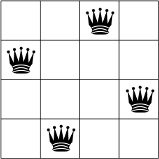


It is usually better to start simple and generalize your implementation. So, let's start with the case when **N = 4**.

**Question 2.1 (0-0.3 pt):** How do you represent a solution (a 4 queen placement on a 4x4 chess board)? In particular, specify the length of your genotype representation, what each gene (dimension) represents, and what values they can get.

**Answer:** the solution can be represented in a single dimensional array of the length four, because its a 4x4 chessboard. The index represents the column of the chess board and the value at that index represents the row for the queen in that column. Through this, I can ensure that there is only 1 queen per column since 2 queens cannot be in the same row. The values in the array are unique and range from 0 to 3 because its a 4x4 board.

**Question 2.2 (0-0.2 pt)**: Please write down an example representation and discuss what it means.

**Answer:** an example representation is [1,3,0,2]. This means, the queen in the first column (index 0) is in the third row. in the second column, (index 1), the queen is in the fourth row. In the third column, (index 2), the queen is in the second row. In the fourth column, (index 3), the queen is in the first row.

It will look something like this:

x Q x x

x x x Q

Q x x x

x x Q x

above, Q represents the queen and x represents an empty space.

**Question 2.3 (0-0.2 pt):** How many possible solutions can be generated in your representation?

**Answer:** in a 4x4 board, there are 4 possible rows and 4 columns, since the queens must be in different rows, the number of possible solutions would be 4 factorial (4!). This is equal to 24 solutions.

---
**Task 2.1 (0-0.20-0.40-0.80):** Implementation of solution encoding, visualization and evaluation functions.

In [220]:
################################################################


example_solution = [1, 3, 0, 2]

################################################################

Write a function below that can visualize your solution. For instance, the output may look like below, a matrix representing the 4x4 chess board where each Q indicates a queen placement and dots are empty cells.


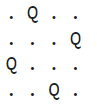

In [278]:
def visualize_solution(solution):
    """Visualize the placement of queens on the chessboard."""

    ################################################################

    length = len(solution) # get the length of the solution
    chess_board = []    # create an empty list to store the chess board

    for i in range(length):
        row = ['.' for j in range(length)]  # create a row with empty cells
        row[solution[i]] = 'Q'  # place the queen on the row
        chess_board.append(' '.join(row))   # append the row to the chess board

    print('\n'.join(chess_board))   # print the chess board

    ################################################################

Write the evaluation function to assess how good your solution is.

In [279]:
def evaluate_solution_n_queens(solution):
    """Calculate the fitness of a solution."""
    number_dims = len(solution)
    no_att_pairs = 0
    for i in range(number_dims):
        for j in range(i + 1, number_dims):
            if solution[i] == solution[j] or abs(i - j) == abs(solution[i] - solution[j]):
                no_att_pairs += 1
    return number_dims - no_att_pairs

Try your implementations to see if your solution encoding matches to visualization and whether the fitness is computed correctly.

In [280]:
#################################
# Grading
# 0 pts: No attempt, representation discussed does not match with the implementation and visualization, fitness is not correct.
# 0.20 : Solution representation matches with visualization, fitness computation is not correct, no explanation in the code.
# 0.50 : Solution representation matches with visualization, fitness computation is correct, no explanation in the code.
# 0.80 : Solution representation matches with visualization, fitness computation is correct, the implementation explained well.
################################################################


###################### DO NOT CHANGE #########################
print("Genotype (solution representation):", example_solution)
print("Phenotype (solution visualization):")
visualize_solution(example_solution)
print("Solution fitness", evaluate_solution_n_queens(example_solution))
###################### DO NOT CHANGE #########################

Genotype (solution representation): [1, 3, 0, 2]
Phenotype (solution visualization):
. Q . .
. . . Q
Q . . .
. . Q .
Solution fitness 4


---

**Task 2.2 (0-0.4-0.8-1.2-1.6 pt):** Write an evolutionary algorithm that can initialize a population of solutions and finds N queen placement to NxN board optimizing the number of attacks (could be minimization or maximization based on your evaluation function of the solutions).

In [333]:
#################################
# Grading
# 0 pts if the code does not work, code works but it is fundamentally incorrect
# 0.4 pts if the code works but some functions are incorrect and it is badly explained
# 0.8 pts if the code works but some functions are incorrect but it is explained well
# 1.2 pts if the code works very well aligned with the task without any mistakes, but it is badly explained
# 1.6 pts if the code works very well aligned with the task without any mistakes, and it is well explained
################################################################


#initialize a population of solutions for the N queens problem where num_dims = N 
def initialization_n_queens(population_size, num_of_dims):
    """Generate a population of solutions."""
    ################################################################
    x=[]
    # PLEASE FILL IN
    for i in range(population_size):
        solution = np.random.permutation(num_of_dims).tolist() # generate a random solution
        x.append(solution)
    return x
    ################################################################



def evaluation_n_queens(x):
    """Evaluate the whole population and return the fitness of each."""
    return [evaluate_solution_n_queens(solution) for solution in x] # evaluate the fitness of each individual in the population


def crossover_n_queens(x_parents, p_crossover):
    """Perform crossover to create offsprings."""

    ################################################################

    offspring = []
    for i in range(0, len(x_parents), 2):
        if np.random.rand() < p_crossover: # check if the crossover probability is met
            cross_point = np.random.randint(len(x_parents[i])) # select a random crossover point
            offspring.extend([x_parents[i][:cross_point] + x_parents[i+1][cross_point:], x_parents[i+1][:cross_point] + x_parents[i][cross_point:]]) # create the offspring by combining the parents
        else:
            offspring.extend([x_parents[i], x_parents[i+1]]) # if the crossover probability is not met, the offspring is the same as the parent

    return offspring   # return the offsprings

    ################################################################



def mutation_n_queens(x, mutation_rate):
    """Apply mutation to an individual."""

    ################################################################

    for i in range(len(x)):
        if np.random.rand() < mutation_rate: # check if the mutation probability is met
            s1 = np.random.randint(len(x[i])) # select a random gene
            s2 = np.random.randint(len(x[i])) # select another random gene
            x[i][s1], x[i][s2] = x[i][s2], x[i][s1] # swap the genes
    return x

    ################################################################


def parent_selection_n_queens(x, f):
    """Select parents for the next generation"""

    ################################################################

    x_parents = []
    f_parents = []
    for i in range(len(x)):
        tourny = np.random.choice(len(x), 5) # select 5 random individuals
        best_sol = np.argmax([f[i] for i in tourny]) # select the best individual
        x_parents.append(x[tourny[best_sol]]) # add the best individual to the parents
        f_parents.append(f[tourny[best_sol]]) # add the fitness of the best individual to the parents
    if len(x_parents) % 2 != 0:  # If number of parents is odd
        x_parents.append(x_parents[np.random.randint(len(x_parents))])  # Add a random parent
        f_parents.append(f_parents[np.random.randint(len(f_parents))])  # Add the fitness of the random parent
    return x_parents, f_parents


    ####################################


def survivor_selection_n_queens(x, f, x_offspring, f_offspring):
    """Select the survivors, for the population of the next generation"""


    ################################################################

    idx = np.argmax(f) # find the index of the best individual
    elite = x[idx] # select the elite individual

    comb_x = x + x_offspring # combine the parents and offspring
    comb_f = f + f_offspring # combine the fitness of the parents and offspring

    sort_ind = np.argsort(comb_f) # sort the individuals based on their fitness
    num_of_surv = len(x) # calculate the number of survivors
    surv_ind = sort_ind[-num_of_surv:] # select the survivors
    

    x = [comb_x[i] for i in surv_ind] # select the survivors
    f = [comb_f[i] for i in surv_ind] # select the fitness of the survivors

    idx = np.argmin(f) # find the index of the worst individual
    x[idx] = elite # replace the worst individual with the elite individual
    f[idx] = evaluation_n_queens([elite])[0] # evaluate the fitness of the elite individual
    
    return x, f

    ################################################################




def ea_n_queens(population_size, max_fit_evals, p_crossover, m_rate, num_of_dims):

    max_generations = int(max_fit_evals / population_size) # calculate the number of generations based on the maximum number of fitness evaluations

    #########################
    x = initialization_n_queens(population_size, num_of_dims) # initialize the population
    f = evaluation_n_queens(x) # evaluate the fitness of the population
    
    #########################

    # Get best individual and append to list
    idx = np.argmax(f) # find the index of the best individual
    x0_best = x[idx] # select the best individual
    f0_best = f[idx] # select the fitness of the best individual
    x_best = [x0_best] # store the best solution in each generation
    f_best = [f0_best] # store the best fitness in each generation

    # Loop over the generations
    for i in range(int(max_fit_evals / population_size)):
        if max(f) == num_of_dims:  # If a valid solution is found, stop the algorithm
            break
        # Select population size parents
        x_parents, f_parents = parent_selection_n_queens(x, f) # select the parents

        x_offspring = crossover_n_queens(x_parents, p_crossover) # create the offspring

        x_offspring = mutation_n_queens(x_offspring, m_rate) # mutate the offspring

        f_offspring = evaluation_n_queens(x_offspring) # evaluate the fitness of the offspring

        idx = np.argmax(f) # find the index of the best individual
        elite = x[idx] # select the elite individual

        x, f = survivor_selection_n_queens(x, f, x_offspring, f_offspring) # select the survivors
        
        idx = np.argmin(f) # find the index of the worst individual
        x[idx] = elite # replace the worst individual with the elite individual
        f[idx] = evaluation_n_queens([elite])[0] # evaluate the fitness of the elite individual

        idx = np.argmax(f) # find the index of the best individual
        xi_best = x[idx] # select the best individual
        fi_best = f[idx] # select the fitness of the best individual
        if fi_best > f_best[-1]: # check if the new best individual is better than the previous best individual
            x_best.append(xi_best) # store the best solution in each generation
            f_best.append(fi_best) # store the best fitness in each generation
        else:
            x_best.append(x_best[-1]) # store the best solution in each generation
            f_best.append(f_best[-1]) # store the best fitness in each generation

    return x, f_best

---
**Results:**

Run the code below to run an EA for N=8, 16 and 32, and visualize the best solutions found.


In [334]:
print("Case when N=8:")

x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 8)


print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=8:
Best fitness: 8
Best solution found:
. . . . . . Q .
. . . Q . . . .
. Q . . . . . .
. . . . . . . Q
. . . . . Q . .
Q . . . . . . .
. . Q . . . . .
. . . . Q . . .


In [336]:
print("Case when N=16:")
x_best, f_best = ea_n_queens(200, 100000, 0.9, 0.2, 16)


print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=16:
Best fitness: 16
Best solution found:
. . . . . . . Q . . . . . . . .
. . Q . . . . . . . . . . . . .
. . . . . . . . . . . . Q . . .
. . . . . Q . . . . . . . . . .
. . . . . . . . . . . . . . . Q
. . . . . . . . . . Q . . . . .
. . . . . . . . . . . . . . Q .
. . . . . . . . . . . Q . . . .
. . . . Q . . . . . . . . . . .
Q . . . . . . . . . . . . . . .
. . . Q . . . . . . . . . . . .
. . . . . . Q . . . . . . . . .
. . . . . . . . . Q . . . . . .
. . . . . . . . . . . . . Q . .
. . . . . . . . Q . . . . . . .
. Q . . . . . . . . . . . . . .


In [284]:
print("Case when N=32:")
x_best, f_best = ea_n_queens(200, 50000, 0.7, 0.2, 32)

print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=32:
Best fitness: 32
Best solution found:
. . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . .
. . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . .
. . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . .
. . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . .
. . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . .
. . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q
. . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . .
. . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . Q . . . . . . . . . . . . . . . . . . . . 

---

**Question 2.4 (0-0.2-0.4-0.6-1-1.5 pt):** Describe the results. What was the fitness found for each case? Were you able to find fitness scores of 8, 16 and 32 for N=8, 16 and 32 cases? How did you find them? Did you try improving the results by testing different parameters and/or evolutionary operators?

Grading:

0 pts: no solution or visualization provided.

0.2 pts: Solutions and visualizations were provided, no insights provided how the results achieved. 

0.4 pts: Solutions and visualizations were provided, at least for N=8, a optimum solution was found, limited/no insights provided on how this result is achieved. 

0.6 pts: Solutions and visualizations were provided, at least for N=8, a optimum solution was found, insights on how this result is achieved provided.

1 pts: Solutions and visualizations were provided, for N=8 and N=16, optimum solutions were found, insights on how this result is achieved provided. 

1.5 pts: Solutions and visualizations were provided, for N=8, N=16 and N=32, optimum solutions were found, insights on how this result is achieved provided. 

**Answer:** The results I received were a bit random and thus varied, but I was able to consistently get the best fitness scores of 8, 16, and 32 for the cases N=8, 16, and 32 respectively. These scores tell the solutions where no two queens threaten each other. To achieve this result, I initially used a single point crossover and a swap mutation. However I later realized that these methods were not going to be sufficient to find the optimal solutions for larger problem sizes. To improve these results, I implemented a scramble mutation which shuffles a subset of the genes in an individual. However, it didn't work the way I expected it to. After this, I tried implementing elitism in the survivor selection step, where the best individuals from each generation are carried over to the next generation. This helped ensure the quality of population did not degrade over time. By experimenting with different parameters and evolutionary operators, I was able to find the optimal solutions for N=8, N=16 and N=32 cases.

---

#### Plotting the average performance of the algorithm
Use the cells below to plot the results of your algorithm similar to Part 1. The plots should show average and std of 10 runs of EA for n-queens problem for N=8, 16, 32.

In [308]:
def run_experiment_n_queens(population_size, p_crossover, m_rate):
    # These are the hyperparameters of your evolutionary algorithm. You are not allowed to change them.

    max_fit_evals = 10000

    fitness_8 = []
    fitness_16 = []
    fitness_32 = []

    runs = 10

    for run in range(runs):
        print("Run: ", run)

        _, f_best_8 = ea_n_queens(
            population_size[0], max_fit_evals, p_crossover[0], m_rate[0], num_of_dims=8
        )
        _, f_best_16 = ea_n_queens(
            population_size[1], max_fit_evals, p_crossover[1], m_rate[1], num_of_dims=16
        )
        _, f_best_32 = ea_n_queens(
            population_size[2], max_fit_evals, p_crossover[2], m_rate[2], num_of_dims=32
        )
        fitness_8.append(f_best_8)
        fitness_16.append(f_best_16)
        fitness_32.append(f_best_32)

    avg_8, std_8 = calculate_mean_std(fitness_8)
    avg_16, std_16 = calculate_mean_std(fitness_16)
    avg_32, std_32 = calculate_mean_std(fitness_32)

    avgs = [avg_8, avg_16, avg_32]
    stds = [std_8, std_16, std_32]
    all_runs = [fitness_8, fitness_16, fitness_32]

    return avgs, stds, all_runs

In [309]:
population_size = [100, 100, 100]  # not allowed to change
p_crossover = [0.8, 0.8, 0.8]  # not allowed to change
m_rate = [0.1, 0.1, 0.1]  # not allowed to change

avgs_experiment_1, stds_experiment_1, all_runs_experiment_1 = run_experiment_n_queens(
    population_size, p_crossover, m_rate    
)

Run:  0


Run:  1
Run:  2
Run:  3
Run:  4
Run:  5
Run:  6
Run:  7
Run:  8
Run:  9


In [310]:
labels = ["N = 8", "N = 16", "N = 32"]

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=None,
    stds_experiment_2=None,
    n_columns=3,
    n_queens=[8, 16, 32],
)

**Question 2.5 (0-0.2-0.4 pt)** Describe the average performance of the algorithm. What was the maximum average fitness found for each case? Do you see any differences between the problem cases?

**Answer**: The average performance of the algorithm seems to be the best for sphere function with 10 dimensions. sphere function with 50 dimensions is comparatively showing a lower value then sphere with 10 dimensions. in Ackley functions, the average fitness seems to be lower than the 10-dimensional sphere case. This suggests that EA finds it more challenging to optimize for Ackley function compared to sphere function, even with the same no. of dimensions.

